In [32]:
#Importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

%pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import warnings

warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 1.1 MB/s eta 0:00:0000:0100:05m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 1.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 1.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [3]:
import pandas as pd

url = "https://www.smartatlantic.ca/erddap/tabledap/SMA_halifax.csv?station_name%2Ctime%2Cwind_spd_avg%2Cwind_spd_max%2Cwind_dir_avg%2Cair_temp_avg%2Cair_pressure_avg%2Csurface_temp_avg%2Cwave_ht_max%2Cwave_ht_sig%2Cwave_dir_avg%2Cwave_spread_avg%2Cwave_period_max%2Ccurr_spd_avg%2Ccurr_dir_avg&time%3E=2022-10-23T00%3A00%3A00Z&time%3C=2024-10-30T03%3A53%3A01Z"
try:
  df = pd.read_csv(url)
  print(df.head())
except Exception as e:
  print(f"An error occurred: {e}")

  station_name                  time wind_spd_avg wind_spd_max wind_dir_avg  \
0          NaN                   UTC        m s-1        m s-1       degree   
1  smb_halifax  2022-10-23T00:23:01Z          1.9          2.2          259   
2  smb_halifax  2022-10-23T00:53:01Z          2.7          3.5          232   
3  smb_halifax  2022-10-23T01:23:01Z          1.3          1.9          243   
4  smb_halifax  2022-10-23T01:53:01Z          0.9          1.4          253   

  air_temp_avg air_pressure_avg surface_temp_avg wave_ht_max wave_ht_sig  \
0     degree_C             mbar         degree_C           m           m   
1         12.2           1026.6             14.4         1.0         0.6   
2         13.0           1026.7             14.4         0.9         0.6   
3         11.9           1027.1             14.4         1.0         0.6   
4         12.0           1027.4             14.4         0.8         0.6   

  wave_dir_avg wave_spread_avg wave_period_max curr_spd_avg curr_dir

In [4]:
df.shape

(31534, 15)

In [6]:
#Converting to Time format
df = df.iloc[1:]
df['time'] = pd.to_datetime(df['time']) 
df.set_index('time', inplace=True)
print(df.head())

                          station_name wind_spd_avg wind_spd_max wind_dir_avg  \
time                                                                            
2022-10-23 00:23:01+00:00  smb_halifax          1.9          2.2          259   
2022-10-23 00:53:01+00:00  smb_halifax          2.7          3.5          232   
2022-10-23 01:23:01+00:00  smb_halifax          1.3          1.9          243   
2022-10-23 01:53:01+00:00  smb_halifax          0.9          1.4          253   
2022-10-23 02:23:01+00:00  smb_halifax          0.9          1.4          272   

                          air_temp_avg air_pressure_avg surface_temp_avg  \
time                                                                       
2022-10-23 00:23:01+00:00         12.2           1026.6             14.4   
2022-10-23 00:53:01+00:00         13.0           1026.7             14.4   
2022-10-23 01:23:01+00:00         11.9           1027.1             14.4   
2022-10-23 01:53:01+00:00         12.0           102

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31533 entries, 2022-10-23 00:23:01+00:00 to 2024-10-30 03:53:01+00:00
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   station_name      31533 non-null  object
 1   wind_spd_avg      31495 non-null  object
 2   wind_spd_max      31495 non-null  object
 3   wind_dir_avg      31495 non-null  object
 4   air_temp_avg      31496 non-null  object
 5   air_pressure_avg  31496 non-null  object
 6   surface_temp_avg  31455 non-null  object
 7   wave_ht_max       31307 non-null  object
 8   wave_ht_sig       31307 non-null  object
 9   wave_dir_avg      31307 non-null  object
 10  wave_spread_avg   31455 non-null  object
 11  wave_period_max   31455 non-null  object
 12  curr_spd_avg      31430 non-null  object
 13  curr_dir_avg      31430 non-null  object
dtypes: object(14)
memory usage: 3.6+ MB


In [8]:
#removing station column and checking for null values
df.drop(['station_name'], axis=1, inplace=True)
print(df.isnull().sum())

wind_spd_avg         38
wind_spd_max         38
wind_dir_avg         38
air_temp_avg         37
air_pressure_avg     37
surface_temp_avg     78
wave_ht_max         226
wave_ht_sig         226
wave_dir_avg        226
wave_spread_avg      78
wave_period_max      78
curr_spd_avg        103
curr_dir_avg        103
dtype: int64


In [9]:
#Handling null values with Forward and backward filling
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [10]:
df.describe()

,wind_spd_avg,wind_spd_max,wind_dir_avg,air_temp_avg,air_pressure_avg,surface_temp_avg,wave_ht_max,wave_ht_sig,wave_dir_avg,wave_spread_avg,wave_period_max,curr_spd_avg,curr_dir_avg
count,31533,31533,31533,31533,31533,31533,31533,31533,31533,31533,31533,31533,31533
unique,180,237,361,451,603,219,74,46,246,52,67,404,361
top,5.1,6.8,249,16.7,1019.2,2.1,0.6,0.3,156.0,37.0,10.0,37,218
freq,457,354,273,196,211,404,3395,5003,1079,3282,2277,439,191


In [15]:
# Converting any strings to numeric value
cols_to_convert = ['wind_spd_avg', 'wind_spd_max', 'wind_dir_avg', 'air_temp_avg', 
                   'air_pressure_avg', 'surface_temp_avg', 'wave_ht_max', 'wave_ht_sig', 
                   'wave_dir_avg', 'wave_spread_avg', 'wave_period_max', 'curr_spd_avg', 'curr_dir_avg']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.isnull().sum()

wind_spd_avg        0
wind_spd_max        0
wind_dir_avg        0
air_temp_avg        0
air_pressure_avg    0
surface_temp_avg    0
wave_ht_max         0
wave_ht_sig         0
wave_dir_avg        0
wave_spread_avg     0
wave_period_max     0
curr_spd_avg        0
curr_dir_avg        0
dtype: int64

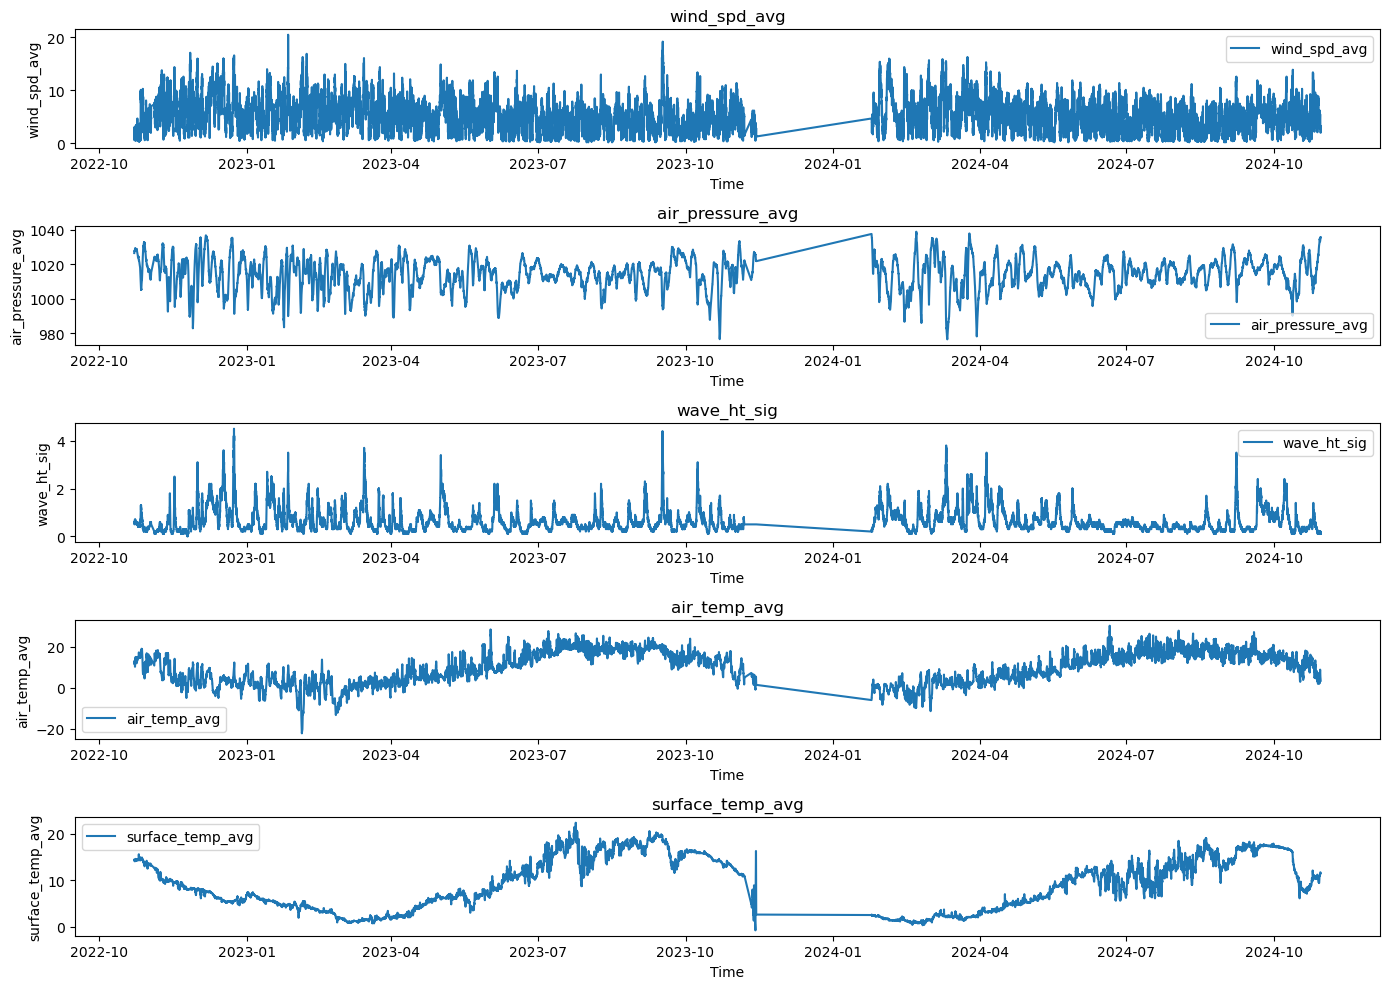

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
variables = ['wind_spd_avg', 'air_pressure_avg', 'wave_ht_sig', 'air_temp_avg', 'surface_temp_avg']

for i, var in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    plt.plot(data.index, data[var], label=var)
    plt.title(var)
    plt.xlabel('Time')
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()

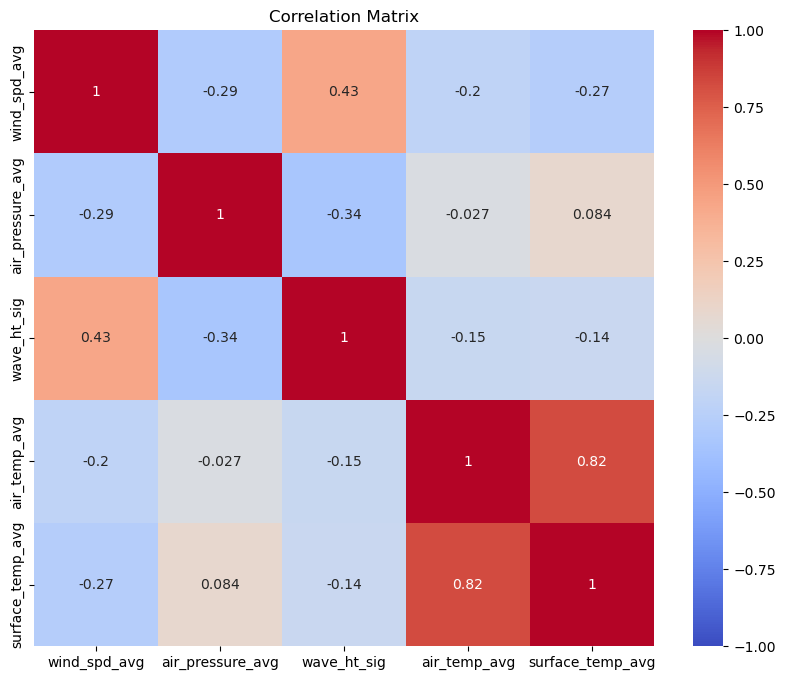

In [18]:
# Plotting Heatmap
correlation_matrix = data[variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [24]:
# Making seperate features scaler and then dividng the scaled_data in to splits
features = ['wind_spd_avg', 'air_pressure_avg', 'air_temp_avg', 'surface_temp_avg']
target = 'wave_ht_sig'

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(data[features])
scaled_target = target_scaler.fit_transform(data[['wave_ht_sig']])

scaled_data = np.concatenate([scaled_features, scaled_target], axis=1)

train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [27]:
def create_sequences(data, n_steps=60):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i - n_steps:i, :-1])  
        y.append(data[i, -1]) 
    return np.array(X), np.array(y)

# Create sequences
n_steps = 60
X_train, y_train = create_sequences(train_data, n_steps)
X_test, y_test = create_sequences(test_data, n_steps)


In [33]:
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.0114 - val_loss: 0.0070
Epoch 2/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - loss: 0.0066 - val_loss: 0.0056
Epoch 3/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 0.0051 - val_loss: 0.0054
Epoch 4/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.0048 - val_loss: 0.0068
Epoch 5/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.0044 - val_loss: 0.0053
Epoch 6/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.0039 - val_loss: 0.0055
Epoch 7/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.0036 - val_loss: 0.0063
Epoch 8/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.0033 - val_loss: 0.0054
Epoch 9/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.0030 - val_loss: 0.0063
Epoch 10/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.0027 - val_loss: 0.0068
Epoch 11/20
787/787 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.0025 - val_loss: 0.0062
Epoch 12/20
787/787 ━━━━━━━━━━

In [34]:
# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Prepare predictions for inverse scaling
train_pred_full = np.concatenate([X_train[:, -1, :-1], train_pred], axis=1)  # Add back last timestep's features
y_train_full = np.concatenate([X_train[:, -1, :-1], y_train.reshape(-1, 1)], axis=1)

test_pred_full = np.concatenate([X_test[:, -1, :-1], test_pred], axis=1)  # Add back last timestep's features
y_test_full = np.concatenate([X_test[:, -1, :-1], y_test.reshape(-1, 1)], axis=1)


787/787 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [36]:
# Inverse transform predictions and actual values
train_pred = target_scaler.inverse_transform(train_pred_full)[:, -1]
y_train_actual = target_scaler.inverse_transform(y_train_full)[:, -1]

test_pred = target_scaler.inverse_transform(test_pred_full)[:, -1]
y_test_actual = target_scaler.inverse_transform(y_test_full)[:, -1]

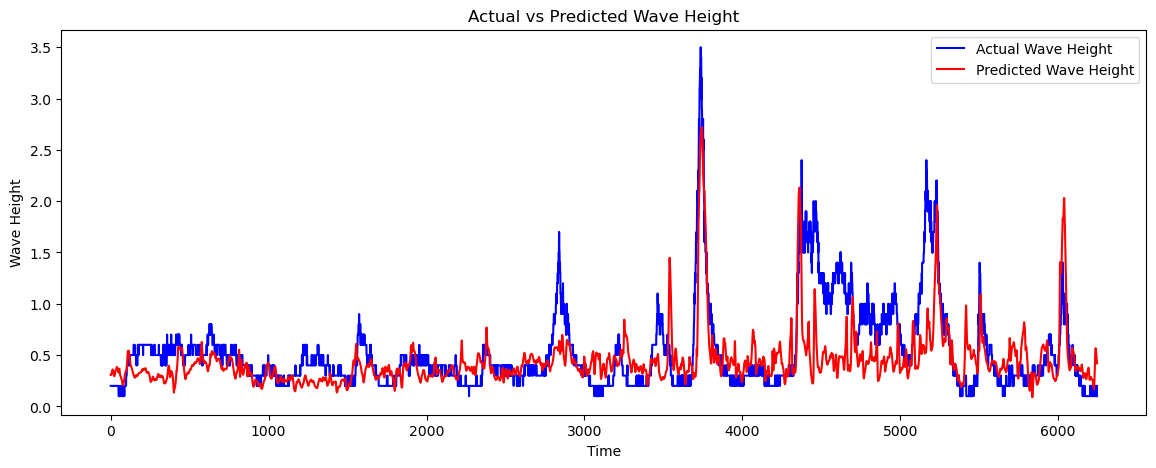

In [37]:
import matplotlib.pyplot as plt

# Plot actual vs predicted wave heights for the test set
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, color='blue', label='Actual Wave Height')
plt.plot(test_pred, color='red', label='Predicted Wave Height')
plt.title('Actual vs Predicted Wave Height')
plt.xlabel('Time')
plt.ylabel('Wave Height')
plt.legend()
plt.show()


In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for test set predictions
rmse = np.sqrt(mean_squared_error(y_test_actual, test_pred))
print(f"Root Mean Squared Error (Test Set): {rmse}")

Root Mean Squared Error (Test Set): 0.3347580071048638


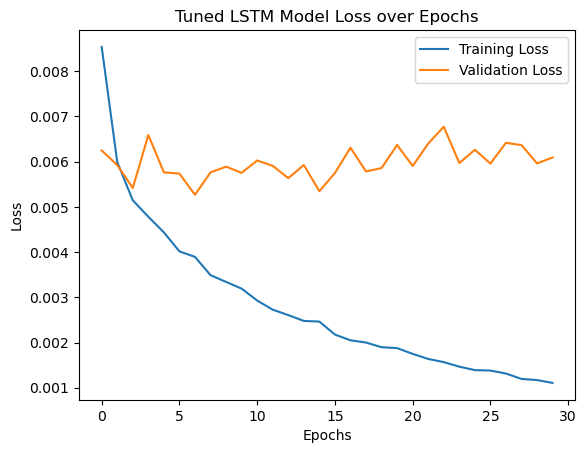

In [45]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Tuned LSTM Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
